In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from scipy import stats
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
movies_excel = pd.read_excel(r'C:\Users\chi_b\OneDrive\Desktop\Linked Class\Movie Project\movie_metadata.xlsx')

In [4]:
print(movies_excel.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [5]:
dframe = movies_excel.drop(['color'], axis=1)

In [6]:
df = dframe.rename(columns={'Movie Category':'movie_cat'})

df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Let's say block busters are ones with gross >= 100,000,000

In [11]:
#Only Blockbuster Movies
block_b = df.loc[df.gross >= 100000000] 
block_b
# block_b_movie = df[block_b]

# block_b_movie

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
2,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
3,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
4,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,David Fincher,216.0,127.0,21000.0,360.0,Brad Pitt,11000.0,100125340.0,Crime|Drama|Mystery|Thriller,Morgan Freeman,...,1080.0,English,USA,R,33000000.0,1995.0,11000.0,8.6,2.35,39000
601,Gary Trousdale,80.0,91.0,21.0,542.0,Jason Alexander,2000.0,100117603.0,Animation|Drama|Family|Musical|Romance,Demi Moore,...,230.0,English,USA,G,100000000.0,1996.0,700.0,6.9,1.78,0
602,Dennis Dugan,198.0,113.0,221.0,503.0,Sayed Badreya,11000.0,100018837.0,Action|Comedy,Adam Sandler,...,380.0,English,USA,PG-13,90000000.0,2008.0,600.0,5.5,1.85,0
603,John McTiernan,148.0,128.0,323.0,489.0,Aldis Hodge,13000.0,100012500.0,Action|Adventure|Thriller,Bruce Willis,...,346.0,English,USA,R,90000000.0,1995.0,559.0,7.6,2.35,0


In [13]:
block_b['genres'].value_counts()

Action|Adventure|Sci-Fi                      32
Action|Adventure|Thriller                    21
Comedy                                       20
Comedy|Romance                               18
Adventure|Animation|Comedy|Family|Fantasy    15
                                             ..
Action|Adventure|Comedy|Family|Romance        1
Drama|Romance|War                             1
Action|Comedy|Drama|Family|Thriller           1
Action|Adventure|Comedy|Romance|Sci-Fi        1
Comedy|Crime|Sport                            1
Name: genres, Length: 236, dtype: int64

In [18]:
#All the genres separately
genres_list = block_b.genres.str.split('|',expand=True).stack().unique()

#Counts for Block Buster Movie Genres
genres_co = Series({genre: block_b.genres.str.contains(genre).sum() for genre in genres_list})
genres_co

Action         256
Adventure      281
Fantasy        154
Sci-Fi         137
Drama          187
Romance        110
Thriller       149
Crime           79
Animation       91
Comedy         250
Family         154
Musical         23
Biography       25
History         14
War             20
Mystery         49
Horror          17
Sport           18
Music           36
Western          9
Documentary      2
dtype: int64

In [19]:
#Turn Series into a DataFrame
genres_cou = genres_co.to_frame()
genres_coun = pd.DataFrame.rename(genres_cou, columns={0:'Counts'})
genres_count = genres_coun.sort_values(by = ['Counts'], ascending= False)
genres_count

,Counts
Adventure,281
Action,256
Comedy,250
Drama,187
Family,154
Fantasy,154
Thriller,149
Sci-Fi,137
Romance,110
Animation,91


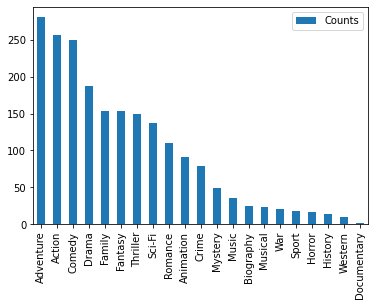

In [20]:
genres_count.plot.bar()

# As we can see, most of the block buster movies are adventure, action and comedy. We can see that action and adventure tends to go together as well. 41.3% of the block buster movies have adventure as a major genre. The movie genre with the least block buster is documentary appearing only twice 
